# Time Series From Scratch (part. 2) — Introduction to Time Series with Pandas (Dario Radečić)
[Source](https://towardsdatascience.com/time-series-from-scratch-introduction-to-time-series-with-pandas-347ac9c6b451). From [Time Series From Scratch](https://towardsdatascience.com/tagged/time-series-from-scratch).

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

In [32]:
# from tqdm import tqdm

# from glob import glob

# import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [33]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.11.0-7620-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 3d0b1240da8b6612620dff8921a6898b7024f57f

Git repo: https://github.com/ysraell/forecasting.git

Git branch: main

numpy     : 1.19.5
matplotlib: 3.4.2
pandas    : 1.3.1

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


In [5]:

# Arbitrary date
print('Arbitrary date: ', end=' ')
print(datetime(year=2021, month=5, day=15))

# Arbitary date and time
print('Date and time:  ', end=' ')
print(datetime(year=2021, month=5, day=15, hour=7, minute=23, second=44))

# Now
print('Date right now: ', end=' ')
print(datetime.now())

# Yesterday
print('Date yesterday: ', end=' ')
print(datetime.now() - timedelta(days=1))

Arbitrary date:  2021-05-15 00:00:00
Date and time:   2021-05-15 07:23:44
Date right now:  2021-07-31 18:05:17.453473
Date yesterday:  2021-07-30 18:05:17.454324


In [6]:
now = datetime.now()
print(now.year, now.month, now.day, now.hour, now.minute, now.second)

2021 7 31 18 28 17


In [7]:
date_list = [
    datetime(2021, 7, 1),
    datetime(2021, 7, 2),
    datetime(2021, 7, 3)
]
date_list

[datetime.datetime(2021, 7, 1, 0, 0),
 datetime.datetime(2021, 7, 2, 0, 0),
 datetime.datetime(2021, 7, 3, 0, 0)]

In [8]:


date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64')
date_list

array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[D]')

In [9]:
date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[s]')
date_list

array(['2021-07-01T00:00:00', '2021-07-02T00:00:00',
       '2021-07-03T00:00:00'], dtype='datetime64[s]')

In [10]:
date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[Y]')
date_list

array(['2021', '2021', '2021'], dtype='datetime64[Y]')

In [11]:
date_list = np.arange('2021-07-01', '2021-08-01', dtype='datetime64[D]')
date_list

array(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
       '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
       '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
       '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
       '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
       '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
       '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
       '2021-07-29', '2021-07-30', '2021-07-31'], dtype='datetime64[D]')

In [12]:
date_list = pd.date_range(start='2021-07-01', end='2021-07-05')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05'],
              dtype='datetime64[ns]', freq='D')

In [16]:
date_list = pd.date_range(start='2021-07-01', periods=10, freq='D')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
print(f'Minimum date: {date_list.min()}')
print(f'Maximum date: {date_list.max()}')

Minimum date: 2021-07-01 00:00:00
Maximum date: 2021-07-10 00:00:00


In [19]:
df = pd.read_csv('/work/data/LTOTALNSA.csv', index_col='DATE', parse_dates=True)
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


In [20]:
yearly_totals = df.resample(rule='Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


In [23]:
quarterly_means = df.resample(rule='Q').mean()
quarterly_means.head()

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


In [27]:
df_shift = df.copy()
df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)
df_shift.head()

,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


In [28]:
df_shift = df.copy()
df_shift['Shift_Neg1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Shift_Neg2'] = df_shift['LTOTALNSA'].shift(-2)
df_shift.tail()

,LTOTALNSA,Shift_Neg1,Shift_Neg2
DATE,,,
2021-02-01,1192.902,1595.330,1518.579
2021-03-01,1595.330,1518.579,1582.065
2021-04-01,1518.579,1582.065,1295.118
2021-05-01,1582.065,1295.118,NaN
2021-06-01,1295.118,NaN,NaN


In [29]:
df_rolling = df.copy()
df_rolling['QuarterRolling'] = df_rolling['LTOTALNSA'].rolling(window=3).mean()
df_rolling['YearRolling'] = df_rolling['LTOTALNSA'].rolling(window=12).mean()
df_rolling.head(15)

,LTOTALNSA,QuarterRolling,YearRolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


In [30]:
df_diff = df.copy()
df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods=1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods=2)
df_diff.head()

,LTOTALNSA,Diff_1,Diff_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,108.7,NaN
1976-03-01,1216.1,242.8,351.5
1976-04-01,1163.2,-52.9,189.9
1976-05-01,1176.1,12.9,-40.0


In [37]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

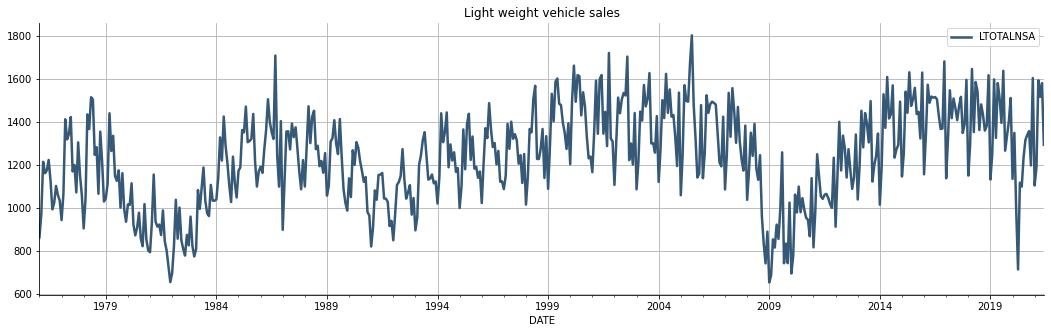

In [38]:
df.plot(figsize=(18, 5), title='Light weight vehicle sales', grid = True);

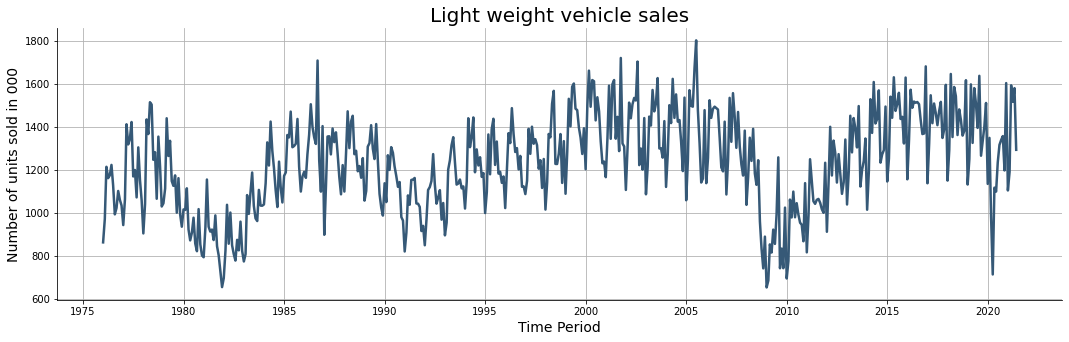

In [40]:

plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.plot(df['LTOTALNSA']);
plt.grid()

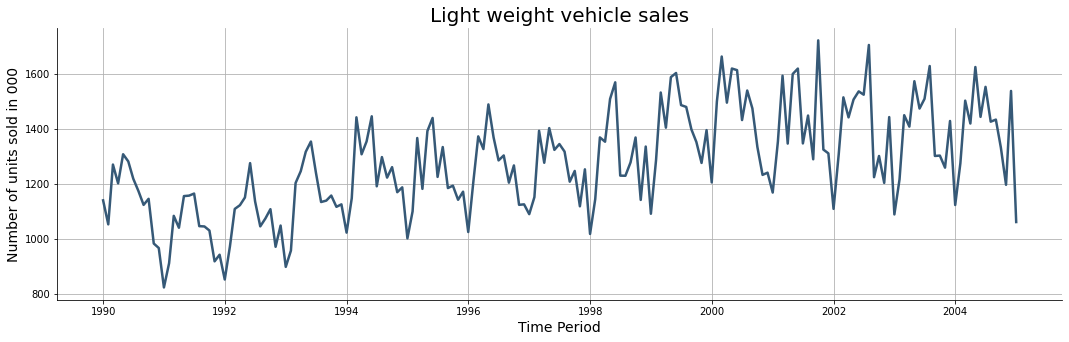

In [42]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']['1990-01-01':'2005-01-01']);
plt.grid()

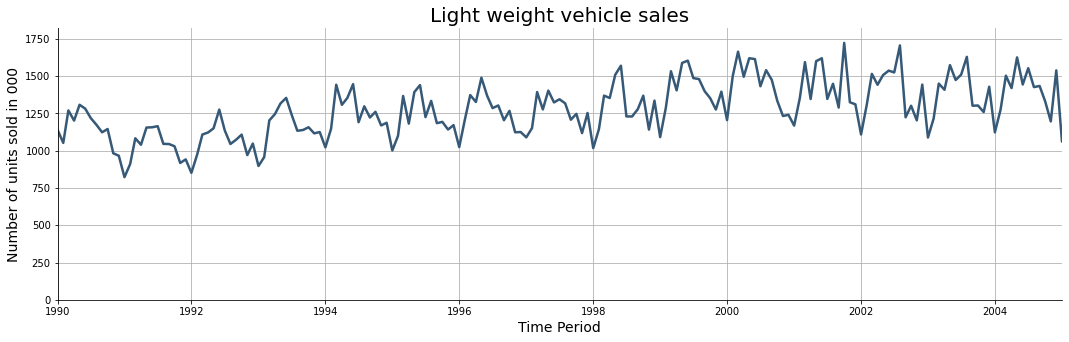

In [46]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.xlim(np.array(['1990-01-01', '2005-01-01'], dtype='datetime64'))
plt.ylim([0, df['LTOTALNSA'].max()*1.01])

plt.plot(df['LTOTALNSA']);
plt.grid()